# Import Required Libraries
Import the necessary libraries, including pandas and numpy.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset
Load the dataset from df_final_demo.txt into a pandas DataFrame.

In [2]:
# Load the data from the CSV file
df = pd.read_csv('../data/processed/navegacion_clientes_experimento.csv', low_memory=False)

df.shape # (clientes: 70609, 9) (final: 422564, 14)

(422564, 14)

## DtypeWarning: Columns (13) have mixed types

In [3]:
# 1) Revisar información general de la columna Variation
print("Info general:")
df.info()  # Observa aquí la info de la columna Variation

print("\nNulos en Variation:", df["Variation"].isnull().sum())

# 2) Ver los valores únicos de Variation
print("\nValores únicos en Variation:")
print(df["Variation"].unique())

# 3) Contar cuántas filas hay de cada valor
print("\nConteo de valores (incluyendo NaN):")
print(df["Variation"].value_counts(dropna=False))

# 4) Verificar los tipos dentro de la misma columna
#   (esto muestra cuántos valores son str, float, int, etc.)
print("\nTipos (type) detectados dentro de Variation:")
print(df["Variation"].apply(type).value_counts())

Info general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422564 entries, 0 to 422563
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         422564 non-null  int64  
 1   visitor_id        422564 non-null  object 
 2   visit_id          422564 non-null  object 
 3   process_step      422564 non-null  object 
 4   date_time         422564 non-null  object 
 5   clnt_tenure_yr    422564 non-null  int64  
 6   clnt_tenure_mnth  422564 non-null  int64  
 7   clnt_age          422564 non-null  float64
 8   gendr             422564 non-null  object 
 9   num_accts         422564 non-null  int64  
 10  bal               422564 non-null  float64
 11  calls_6_mnth      422564 non-null  int64  
 12  logons_6_mnth     422564 non-null  int64  
 13  Variation         302117 non-null  object 
dtypes: float64(2), int64(6), object(6)
memory usage: 45.1+ MB

Nulos en Variation: 120447

Valores únicos 

In [4]:
# 1) Convierto la columna Variation a string
df["Variation"] = df["Variation"].astype(str)

# 2) Los NaN numéricos se convierten en la cadena 'nan'
#    (porque astype(str) convierte el valor NaN en 'nan' de texto)

# Reemplazo la cadena 'nan' por algo como 'Unknown' (o el valor que elijas)
df["Variation"] = df["Variation"].replace("nan", "Unknown")

# 3) (Opcional) Ajusto capitalización y/o elimino espacios
df["Variation"] = df["Variation"].str.strip().str.capitalize()
# Con esto, 'test' -> 'Test', 'control' -> 'Control', 'unknown' -> 'Unknown'

# 4) (Opcional) Convierto a 'category' para ahorrar memoria y dejarlo claro
df["Variation"] = df["Variation"].astype('category')

# 5) Verifico el resultado
print(df["Variation"].value_counts(dropna=False))
print(df["Variation"].dtypes)

# 6) Rename column "Variation" to "variation"
df.rename(columns={"Variation": "variation"}, inplace=True)

# 6) Guardar el CSV con la columna ya limpia
df.to_csv("../data/processed/navegacion_clientes_experimento_limpio.csv", index=False)


Variation
Test       167448
Control    134669
Unknown    120447
Name: count, dtype: int64
category


## Clean date_time

In [5]:


# 1) Revisar información general del DataFrame
print("=== Información general del DataFrame ===")
df.info()

# 2) Revisar cantidad de valores nulos en date_time
print("\n=== Nulos en date_time ===")
print(df["date_time"].isnull().sum())

# 3) Ver valores únicos de date_time (con precaución si son muchos)
#    Aquí muestro solo los primeros 10 valores únicos para no saturar la salida
print("\n=== Ejemplo de valores únicos en date_time (primeros 10) ===")
valores_unicos = df["date_time"].unique()
print(valores_unicos[:10])  # primeros 10

# 4) Contar cuántas veces aparece cada valor
#    Como es posible que cada fecha/hora sea única, se omitirá la salida
#    completa, pero si quieres ver cuántas filas (normalmente 1),
#    puedes descomentar:
# print("\n=== Conteo de cada valor de date_time ===")
# print(df["date_time"].value_counts(dropna=False))

# 5) Verificar los tipos detectados dentro de date_time
print("\n=== Tipos (type) detectados dentro de date_time ===")
print(df["date_time"].apply(type).value_counts())

# 6) (Opcional) Chequear algunas filas aleatorias de la columna
print("\n=== Muestra aleatoria de la columna date_time ===")
print(df["date_time"].sample(5))


=== Información general del DataFrame ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422564 entries, 0 to 422563
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   client_id         422564 non-null  int64   
 1   visitor_id        422564 non-null  object  
 2   visit_id          422564 non-null  object  
 3   process_step      422564 non-null  object  
 4   date_time         422564 non-null  object  
 5   clnt_tenure_yr    422564 non-null  int64   
 6   clnt_tenure_mnth  422564 non-null  int64   
 7   clnt_age          422564 non-null  float64 
 8   gendr             422564 non-null  object  
 9   num_accts         422564 non-null  int64   
 10  bal               422564 non-null  float64 
 11  calls_6_mnth      422564 non-null  int64   
 12  logons_6_mnth     422564 non-null  int64   
 13  variation         422564 non-null  category
dtypes: category(1), float64(2), int64(6), object(5)
memory usa

In [6]:
# 2) Convertir la columna 'date_time' a tipo datetime
df["date_time"] = pd.to_datetime(df["date_time"])

# 3) Verificar el resultado
print(df["date_time"].dtypes)
print(df["date_time"].head())

# 4) (Opcional) Guardar el DF con la columna ya transformada
df.to_csv("../data/processed/navegacion_clientes_experimento_limpio.csv", index=False)

datetime64[ns]
0   2017-04-17 15:27:07
1   2017-04-17 15:26:51
2   2017-04-17 15:19:22
3   2017-04-17 15:19:13
4   2017-04-17 15:18:04
Name: date_time, dtype: datetime64[ns]


# Inspect the Dataset
Inspect the first few rows, data types, and summary statistics of the dataset.

In [7]:
# Inspect the Dataset

# Display the first few rows of the DataFrame to verify the data is loaded correctly
df.head()

# Display the data types of each column
df.dtypes

# Display summary statistics of the dataset
df.describe(include='all').T

# Check for missing values in the dataset
df.isnull().sum()

client_id           0
visitor_id          0
visit_id            0
process_step        0
date_time           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
variation           0
dtype: int64

# Categorical Columns

In [8]:
# Change gender 'X' to 'U'
df['gendr'] = df['gendr'].replace('X', 'U')

# Numerical Columns

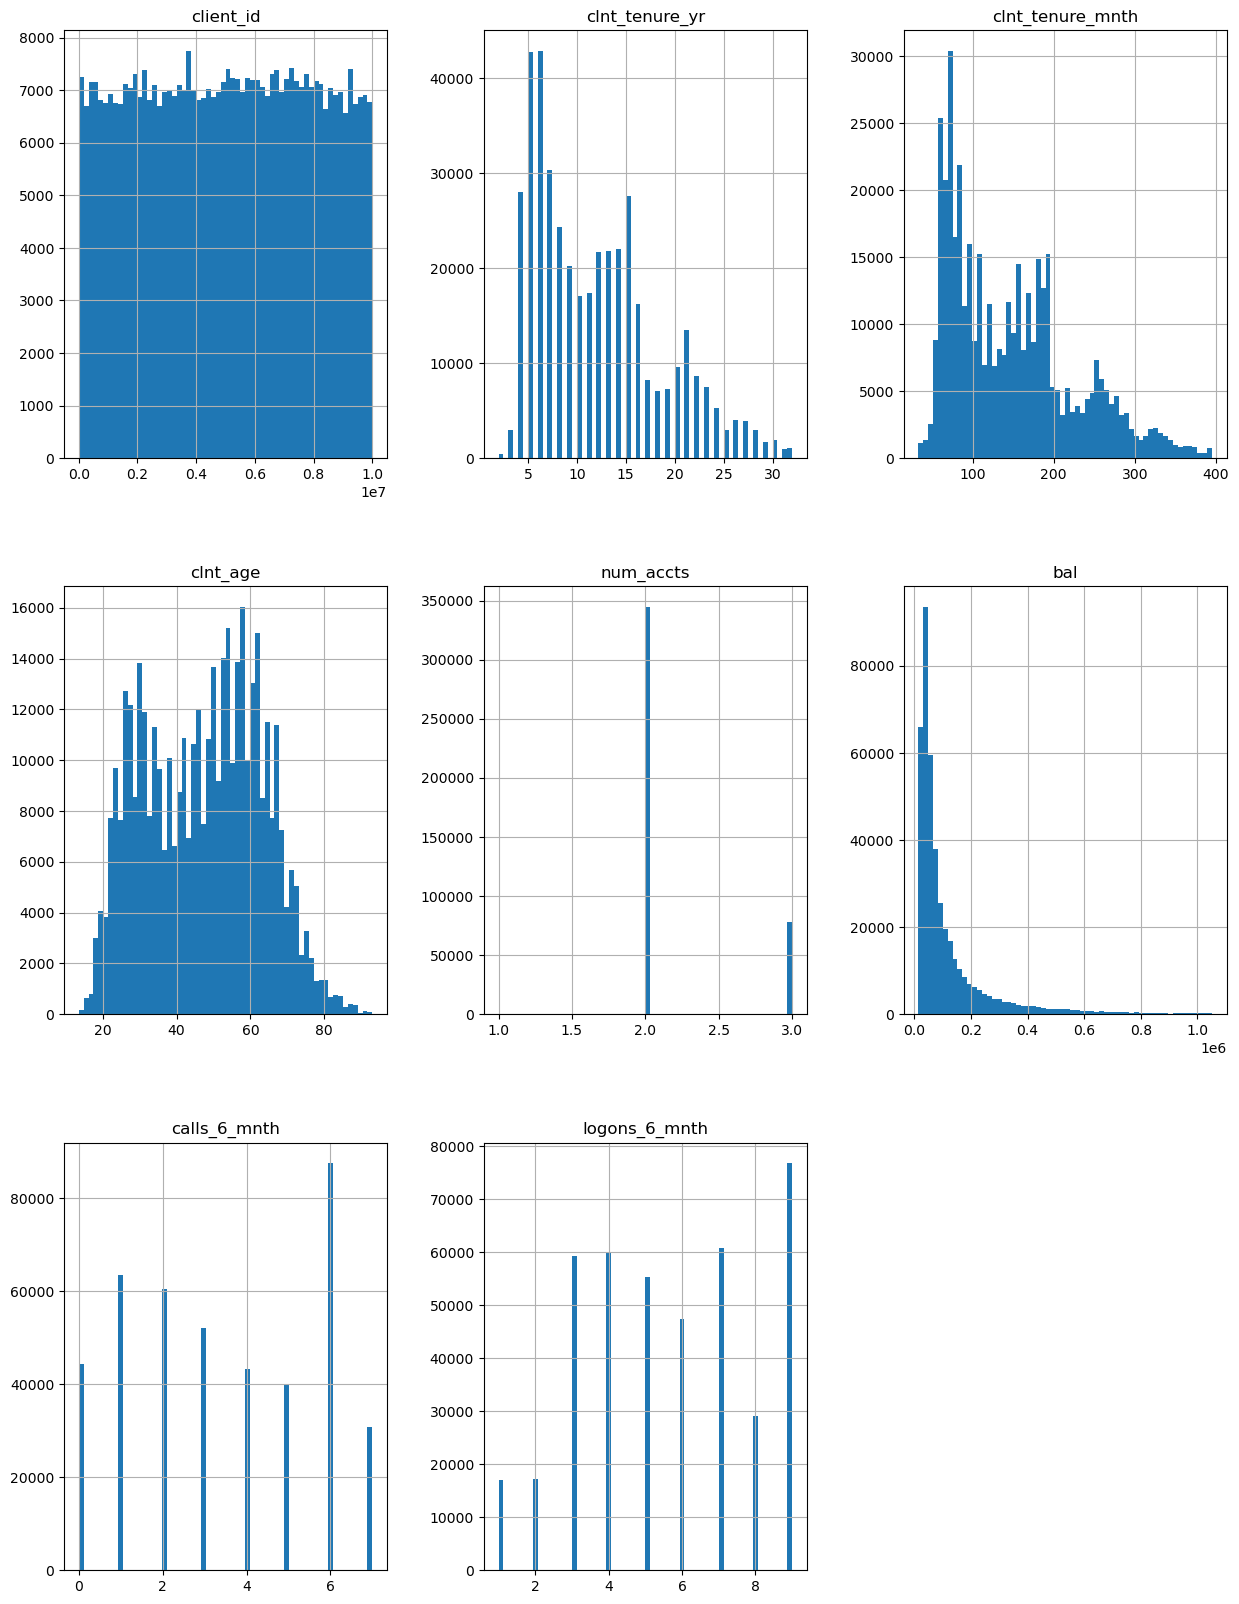

In [9]:
# Get numerical columns
df_numerical = df.select_dtypes(include=[np.number])

df_numerical.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)
plt.show()


# Handle Missing Values
Identify and handle missing values in the dataset, using methods such as filling with mean/median or dropping rows.

In [10]:
# Handle Missing Values

# Check for missing values in the dataset
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# Fill missing values in numerical columns with the mean
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Fill missing values in categorical columns with the mode
categorical_cols = df.select_dtypes(include=[object]).columns
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.fillna(x.mode()[0]))

# Verify that there are no missing values left
missing_values_after = df.isnull().sum()
print("Missing values after handling:\n", missing_values_after)

# Display the first few rows of the DataFrame to verify the changes
df.head()

Missing values in each column:
 client_id           0
visitor_id          0
visit_id            0
process_step        0
date_time           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
variation           0
dtype: int64
Missing values after handling:
 client_id           0
visitor_id          0
visit_id            0
process_step        0
date_time           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
variation           0
dtype: int64


,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5,64,79.0,U,2,189023.86,1,4,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5,64,79.0,U,2,189023.86,1,4,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5,64,79.0,U,2,189023.86,1,4,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5,64,79.0,U,2,189023.86,1,4,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5,64,79.0,U,2,189023.86,1,4,Test


# Convert Data Types
Convert data types of columns to appropriate types, such as converting numerical columns to float or int.

In [11]:
# Convert Data Types

# Convert 'client_id' to string as it is an identifier
df['client_id'] = df['client_id'].astype(str)

# Convert 'clnt_tenure_yr' and 'clnt_tenure_mnth' to integers
df['clnt_tenure_yr'] = df['clnt_tenure_yr'].astype(int)
df['clnt_tenure_mnth'] = df['clnt_tenure_mnth'].astype(int)

# Convert 'clnt_age' to float
df['clnt_age'] = df['clnt_age'].astype(float)

# Convert 'num_accts' to integer
df['num_accts'] = df['num_accts'].astype(int)

# Convert 'bal' to float
df['bal'] = df['bal'].astype(float)

# Convert 'calls_6_mnth' and 'logons_6_mnth' to integers
df['calls_6_mnth'] = df['calls_6_mnth'].astype(int)
df['logons_6_mnth'] = df['logons_6_mnth'].astype(int)

# Verify the data types after conversion
df.dtypes

client_id                   object
visitor_id                  object
visit_id                    object
process_step                object
date_time           datetime64[ns]
clnt_tenure_yr               int32
clnt_tenure_mnth             int32
clnt_age                   float64
gendr                       object
num_accts                    int32
bal                        float64
calls_6_mnth                 int32
logons_6_mnth                int32
variation                 category
dtype: object

# Normalize Column Names
Normalize column names to ensure consistency, such as converting to lowercase and replacing spaces with underscores.

In [12]:
# Normalize Column Names

# Normalize column names to ensure consistency
df.columns = df.columns.str.lower().str.replace(' ', '_')

# Display the updated column names to verify the changes
df.columns

Index(['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time',
       'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts',
       'bal', 'calls_6_mnth', 'logons_6_mnth', 'variation'],
      dtype='object')

# Remove Duplicates
Remove duplicate rows from the dataset to ensure data integrity.

In [14]:
# Remove Duplicates

# Remove duplicate rows from the dataset
df = df.drop_duplicates()

# Verify that duplicates have been removed by checking the number of rows
df.shape

# Save the Cleaned Dataset to CSV

# Save the cleaned dataset to a new CSV file
df.to_csv('../data/processed/navegacion_clientes_experimento_limpio.csv', index=False)


# Handle Outliers

Se ven muy bien con Boxplot (no con histogramas). Para cada columna numérica generar un boxplot para identificar outliers

## Boxplot for 'clnt_age'

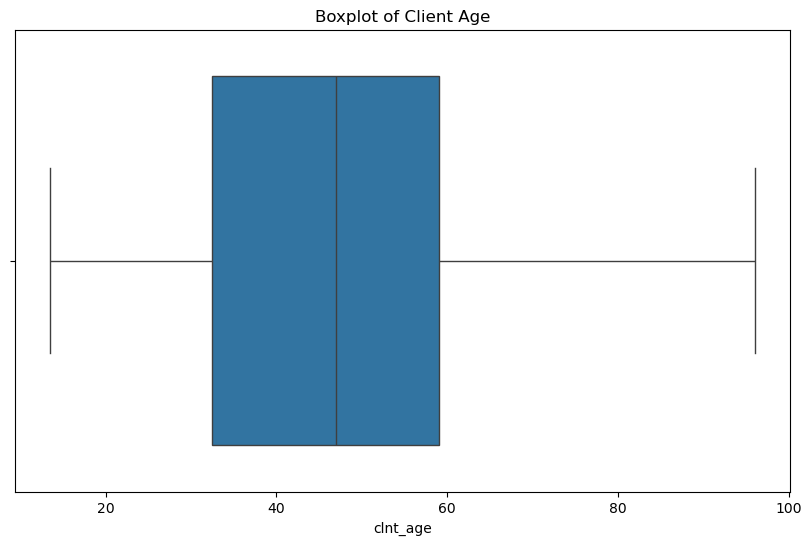

In [38]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['clnt_age'])
plt.title('Boxplot of Client Age')
plt.show()

## Boxplot for 'num_accts'

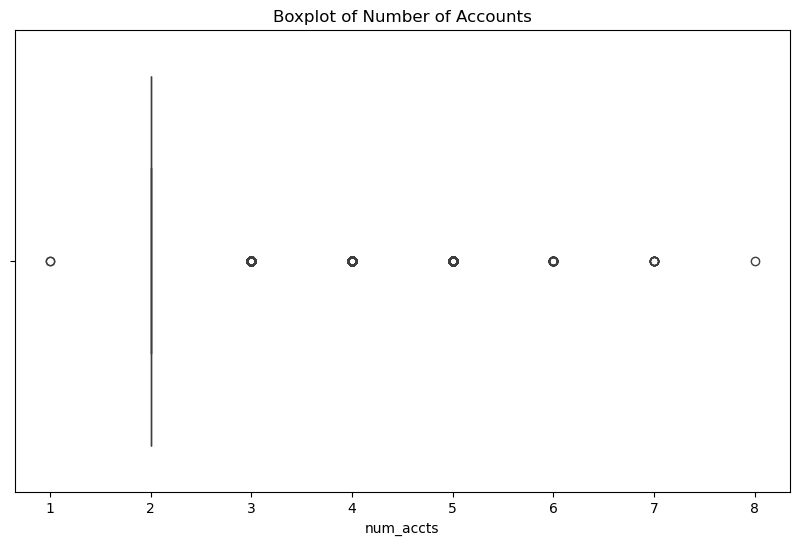

In [41]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['num_accts'])
plt.title('Boxplot of Number of Accounts')
plt.show()

## Boxplot for 'bal'

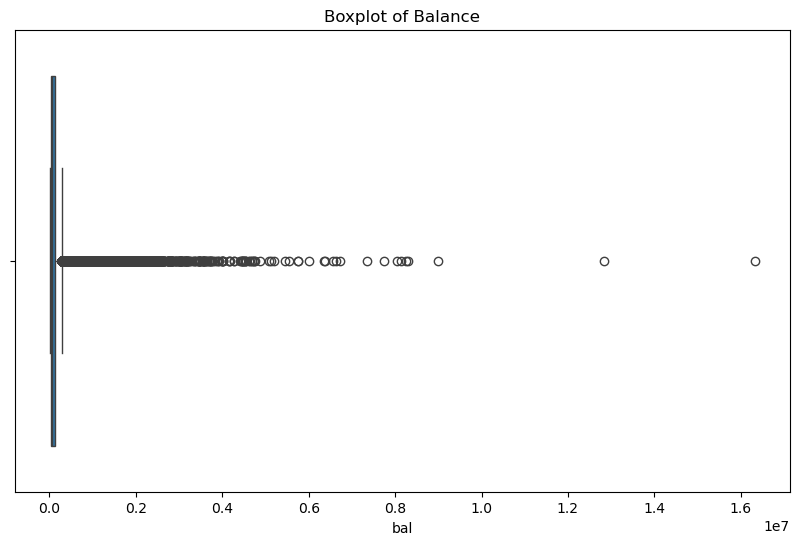

In [42]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['bal'])
plt.title('Boxplot of Balance')
plt.show()

## Boxplot for 'calls_6_mnth'


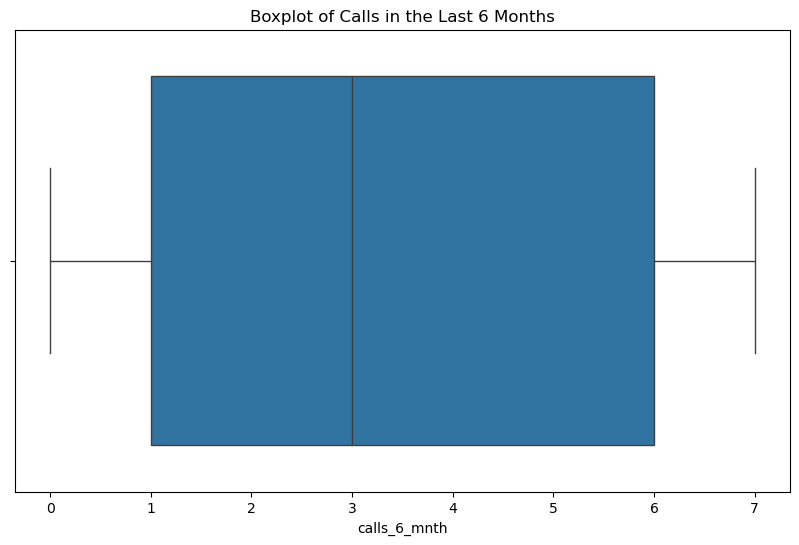

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['calls_6_mnth'])
plt.title('Boxplot of Calls in the Last 6 Months')
plt.show()

## Boxplot for 'logons_6_mnth'

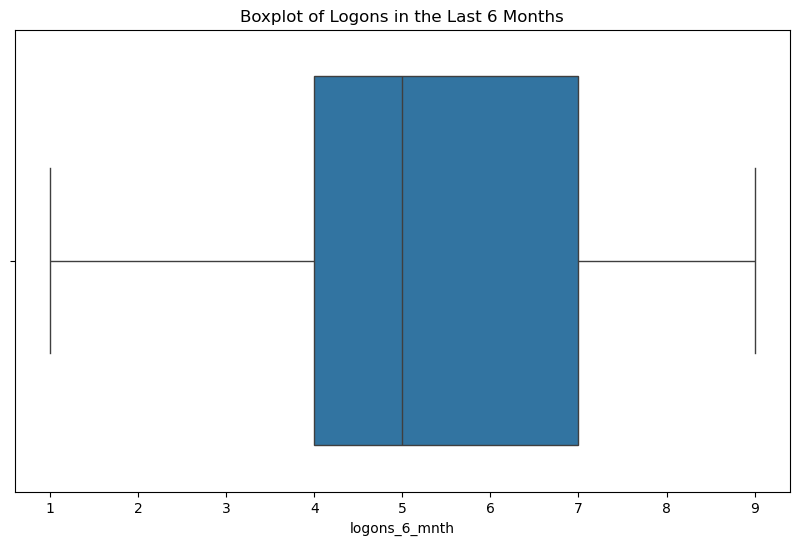

In [44]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['logons_6_mnth'])
plt.title('Boxplot of Logons in the Last 6 Months')
plt.show()

## Removing Outliers

Identify and handle outliers in the dataset using methods such as z-score or IQR.

In [40]:
import scipy.stats as stats

# Handle Outliers

# Calculate the z-scores of the numerical columns
z_scores = np.abs(stats.zscore(df.select_dtypes(include=[np.number])))

# Define a threshold for identifying outliers
threshold = 3

# Identify outliers
outliers = np.where(z_scores > threshold)

# Print the indices of the outliers
print("Indices of outliers:\n", outliers)

# Remove outliers from the dataset
df_cleaned = df[(z_scores < threshold).all(axis=1)]

# Verify the shape of the dataset after removing outliers
print("Shape of the dataset after removing outliers:", df_cleaned.shape)

# Display the first few rows of the cleaned DataFrame to verify the changes
df_cleaned.head()

Indices of outliers:
 (array([    7,    21,    86, ..., 70591, 70591, 70604], dtype=int64), array([3, 4, 3, ..., 0, 1, 4], dtype=int64))
Shape of the dataset after removing outliers: (66621, 9)


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60.5,U,2,45105.30,6,9
1,2304905,7,94,58.0,U,2,110860.30,6,9
2,1439522,5,64,32.0,U,2,52467.79,6,9
3,1562045,16,198,49.0,M,2,67454.65,3,6
4,5126305,12,145,33.0,F,2,103671.75,0,3


# Save Cleaned Dataset
Save the cleaned dataset to a new file for further analysis.

In [36]:
# Save Cleaned Dataset

# Save the cleaned dataset to a new CSV file
df_cleaned.to_csv('../data/processed/clients.csv', index=False)

# Verify that the file has been saved correctly by loading it back and displaying the first few rows
df_loaded = pd.read_csv('../data/processed/clients.csv')
#df_loaded.shape # (66621, 9)
df_loaded.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6,73,60.5,U,2,45105.30,6,9
1,2304905,7,94,58.0,U,2,110860.30,6,9
2,1439522,5,64,32.0,U,2,52467.79,6,9
3,1562045,16,198,49.0,M,2,67454.65,3,6
4,5126305,12,145,33.0,F,2,103671.75,0,3


# Check cleaned CSV

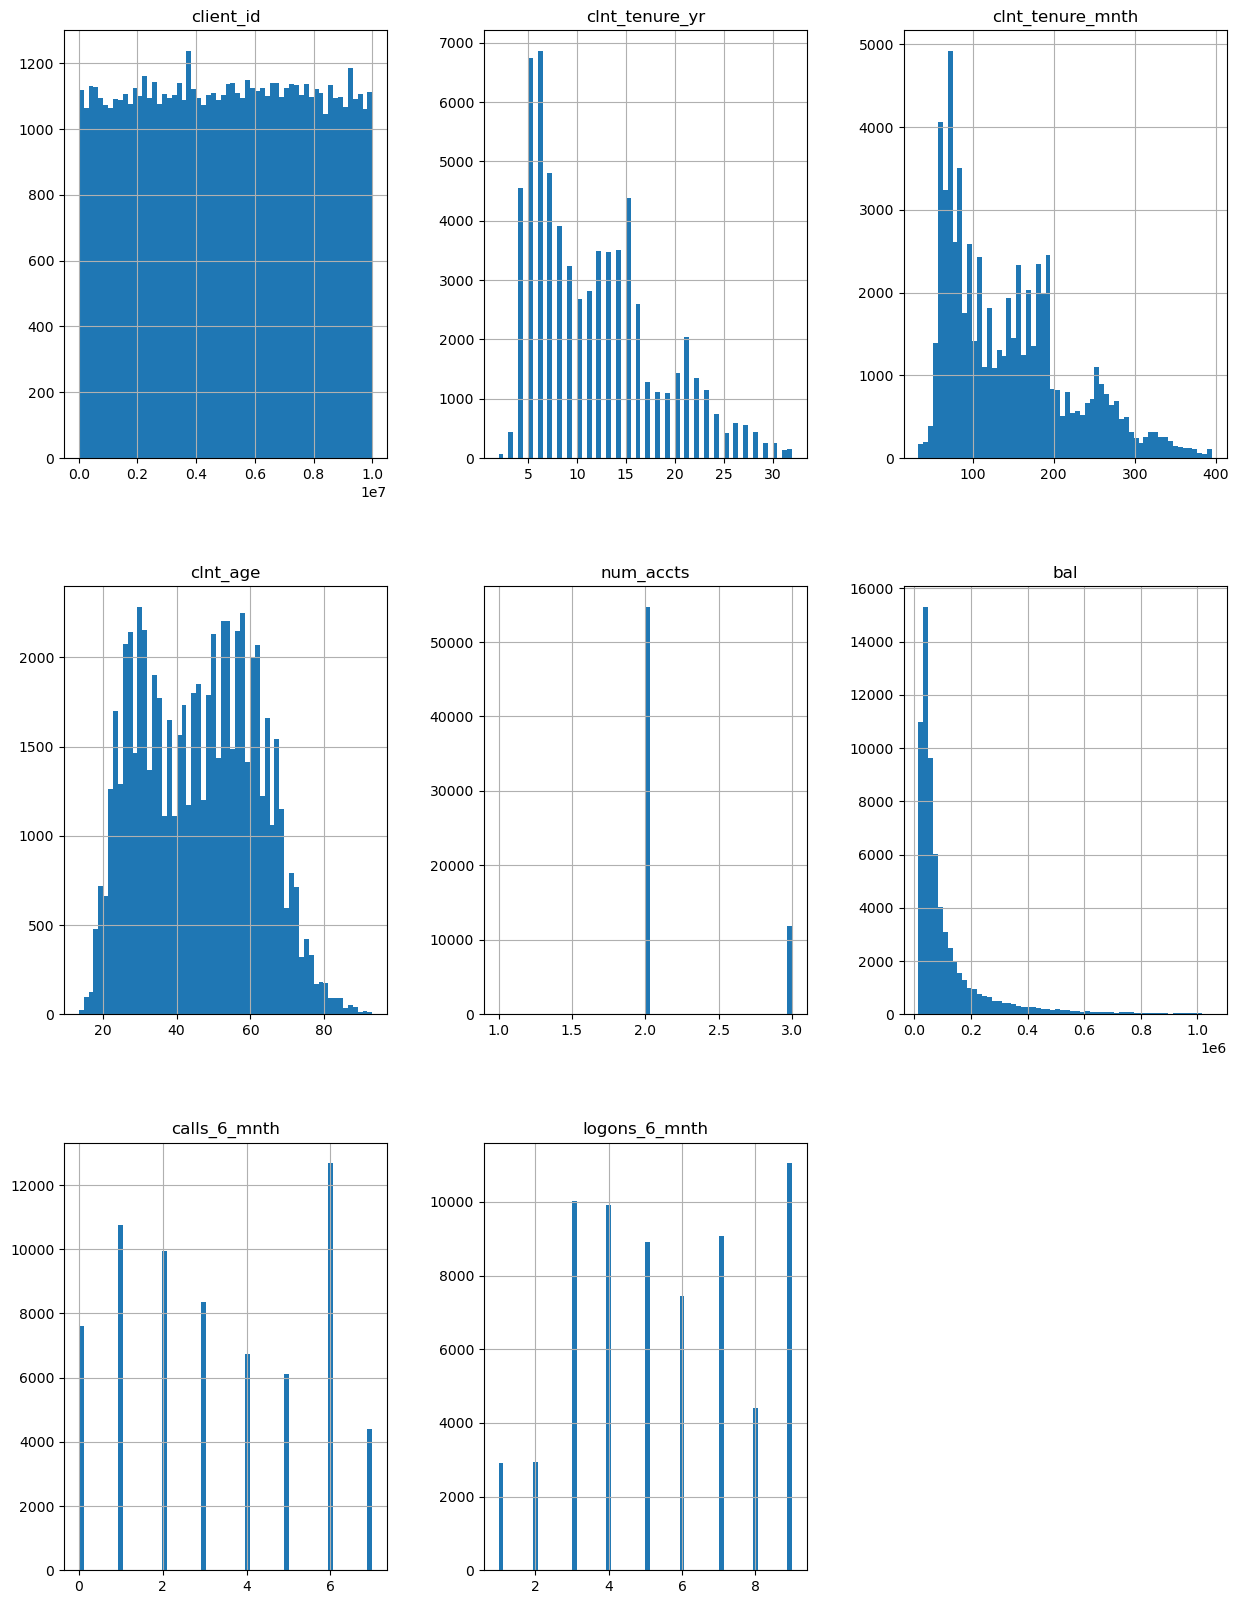

In [37]:
# Get numerical columns
df_numerical_loaded = df_loaded.select_dtypes(include=[np.number])

df_numerical_loaded.hist(figsize=(15, 20), bins=60, xlabelsize=10, ylabelsize=10)
plt.show()

# Verify outliers

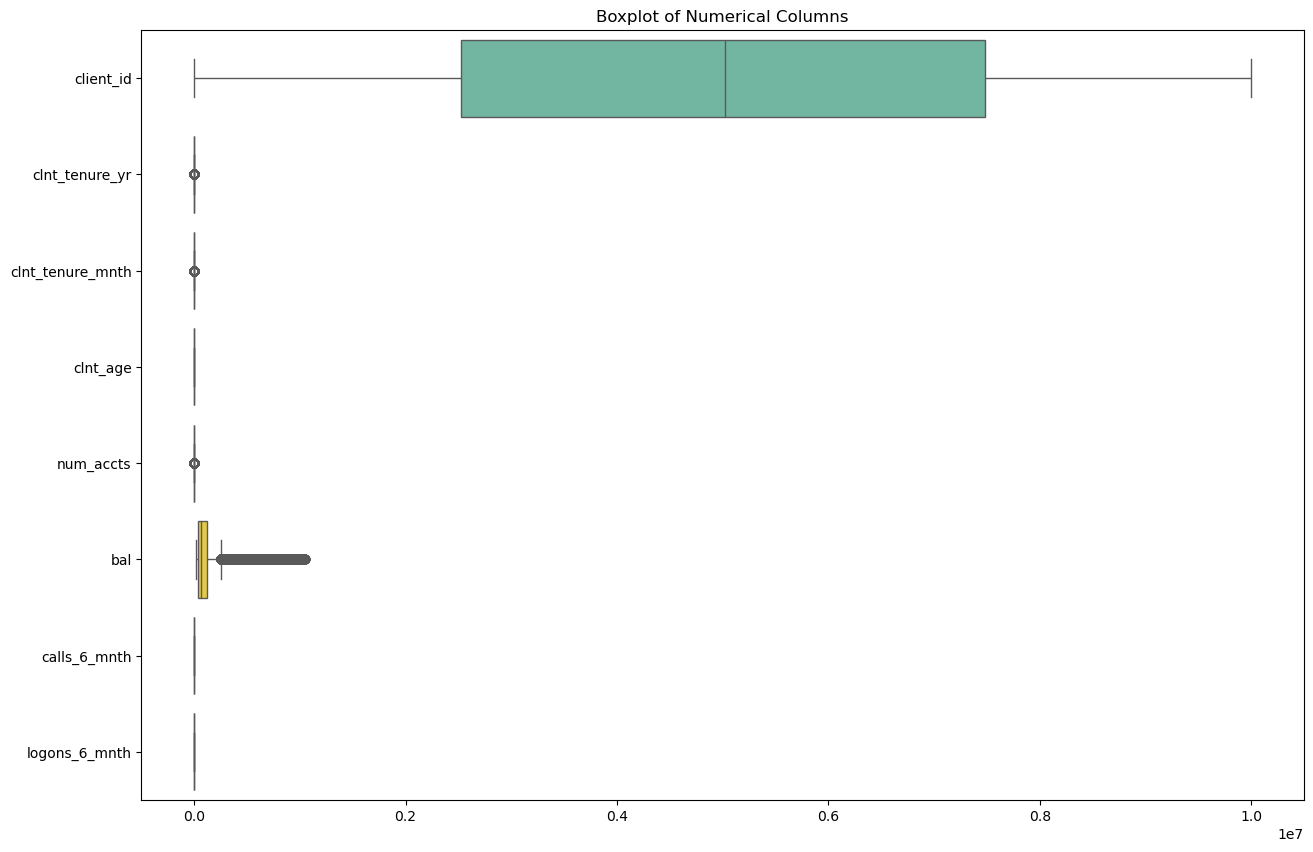

In [ ]:
# Boxplot all numerical columns to check for outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_numerical_loaded, orient='h', palette='Set2')
plt.title('Boxplot of Numerical Columns')
plt.show()

## Tratamiento de Variation = "Unknown"

In [11]:
import pandas as pd

# Cargar el DataFrame original
df = pd.read_csv("../data/raw/df_final_experiment_clients.txt")

# 5) Verificar recuento y porcentaje de "Unknown"
total_rows = len(df)
unknown_rows = df["Variation"].isnull().sum()
unknown_pct = 100 * unknown_rows / total_rows

print(f"Total de filas            : {total_rows}")
print(f"Filas con variation='Unknown' : {unknown_rows} ({unknown_pct:.2f}%)")

# 6) Si el porcentaje de "Unknown" supera cierto umbral, decidimos un tratamiento
umbral = 5.0  # por ejemplo, 5%

if unknown_pct > umbral:
    # Lógica si se excede el umbral
    print(f"ADVERTENCIA: Más de {umbral}% de filas tienen variation='Unknown'. Revisar la causa.")
else:
    # Lógica si es un porcentaje pequeño
    print(f"Solo {unknown_pct:.2f}% son Unknown. Se pueden FILTRAR si se desea.")
    
# 7) (Opcional) Filtrar / eliminar las filas Unknown para el análisis principal
#    Nota: Decide si quieres reasignar el DF o crear uno nuevo
df_filtered = df[df["Variation"] != "NA"].copy()
print(f"df_filtered tiene {len(df_filtered)} filas tras eliminar Unknown.")

# 8) Guardar la nueva versión si se quiere
# df_filtered.to_csv("../data/processed/navegacion_clientes_experimento_filtrado.csv", index=False)

Total de filas            : 70609
Filas con variation='Unknown' : 20109 (28.48%)
ADVERTENCIA: Más de 5.0% de filas tienen variation='Unknown'. Revisar la causa.
df_filtered tiene 70609 filas tras eliminar Unknown.


### Eliminamos variation = Unkown

In [ ]:
import pandas as pd

# Cargar el DataFrame original
df = pd.read_csv("../data/processed/navegacion_clientes_experimento_limpio.csv")

# 5) Verificar recuento y porcentaje de "Unknown"
total_rows = len(df)
unknown_rows = (df["variation"] == "Unknown").sum()
unknown_pct = 100 * unknown_rows / total_rows

print(f"Total de filas            : {total_rows}")
print(f"Filas con Variation='Unknown' : {unknown_rows} ({unknown_pct:.2f}%)")

# 6) Si el porcentaje de "Unknown" supera cierto umbral, decidimos un tratamiento
umbral = 5.0  # por ejemplo, 5%

if unknown_pct > umbral:
    # Lógica si se excede el umbral
    print(f"ADVERTENCIA: Más de {umbral}% de filas tienen Variation='Unknown'. Revisar la causa.")
else:
    # Lógica si es un porcentaje pequeño
    print(f"Solo {unknown_pct:.2f}% son Unknown. Se pueden FILTRAR si se desea.")
    
# 7) (Opcional) Filtrar / eliminar las filas Unknown para el análisis principal
#    Nota: Decide si quieres reasignar el DF o crear uno nuevo
df_filtered = df[df["variation"] != "Unknown"].copy()
print(f"df_filtered tiene {len(df_filtered)} filas tras eliminar Unknown.")

# Elimanos las filas con valores "Unknown"
df = df[df["variation"] != "Unknown"]

# Muestra el número de filas y columnas después de eliminar los valores "Unknown"
df.shape #298441 filas, 14 columnas

df["variation"].value_counts(dropna=False)

# Guardar la nueva versión en ../data/processed/navegacion_clientes_experimento_filtrado_limpio.csv
#df.to_csv("../data/processed/navegacion_clientes_experimento_limpio.csv", index=False)


array(['Test', 'Control'], dtype=object)